# Impact of Remote Work on Mental Health

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("E:/Cuvette/Company Dummy Assignment/Chhirolya tech/Impact_of_Remote_Work_on_Mental_Health.csv")

In [3]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [4]:
# Step 3: Data Preprocessing
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna('Unknown', inplace=True)  # Fill categorical columns with 'Unknown'

In [5]:
# Define categorical columns to encode
categorical_columns = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 
                       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 
                       'Productivity_Change', 'Satisfaction_with_Remote_Work', 
                       'Physical_Activity', 'Sleep_Quality', 'Region']

In [6]:
# Encode categorical columns
label_encoders = {}  # Store label encoders for each column if needed later
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future reference if needed

In [7]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2
1,EMP0002,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1
2,EMP0003,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3
3,EMP0004,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2
4,EMP0005,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3


In [8]:

# Handle Employee_ID
df['Employee_ID'] = df['Employee_ID'].str.replace('EMP','').astype(int)

In [9]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,1,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2
1,2,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1
2,3,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3
3,4,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2
4,5,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3


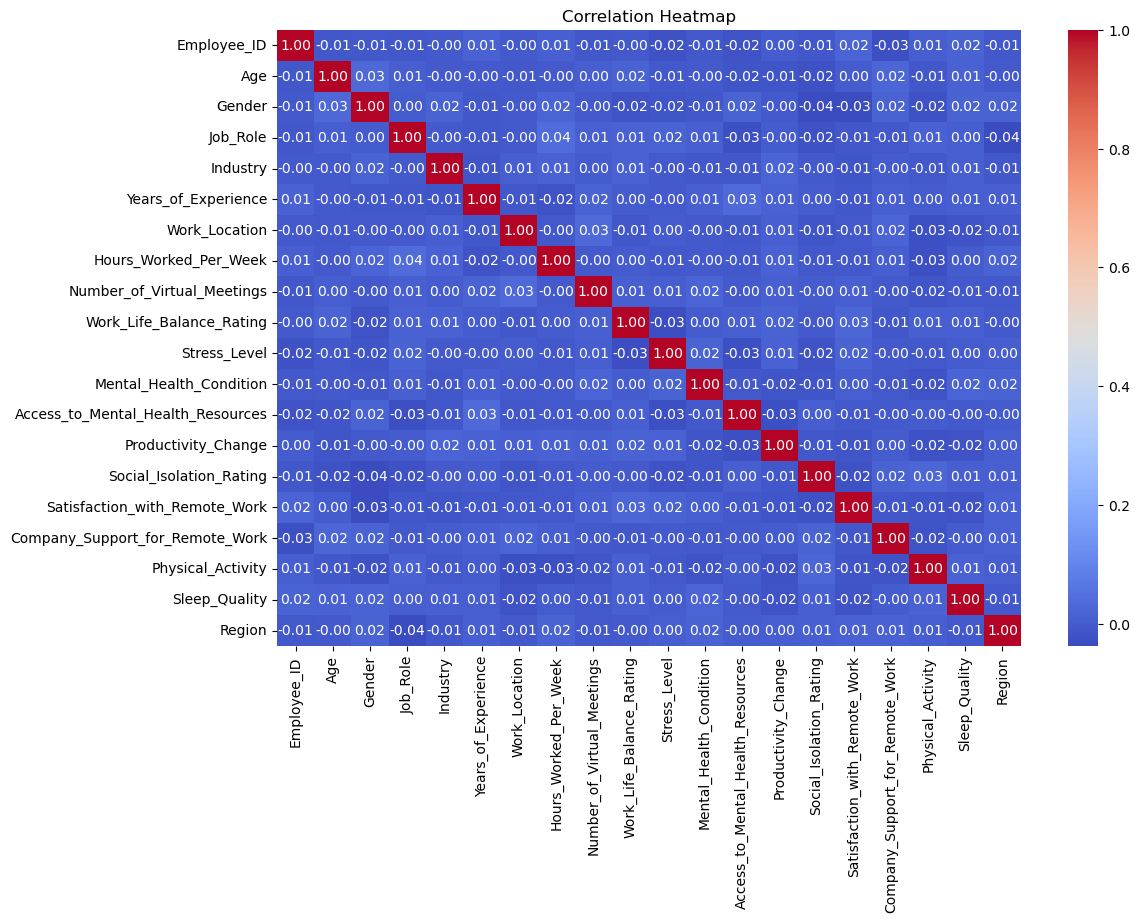

In [10]:
# Step 4: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Step 5: Define Features (X) and Target (y)
X = df.drop(columns=['Productivity_Change', 'Employee_ID'])  # Drop target and irrelevant columns
y = df['Productivity_Change']

In [12]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 7: Train Models
# Model 1: Logistic Regression (for classification)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Step 8: Model Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("-" * 30)

print("Logistic Regression Performance:")
evaluate_model(lr_model, X_test, y_test)

print("Random Forest Performance:")
evaluate_model(rf_model, X_test, y_test)

Logistic Regression Performance:
Model: LogisticRegression
Accuracy: 0.34
Confusion Matrix:
[[186  71  81]
 [147  61  86]
 [198  81  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.55      0.43       338
           1       0.29      0.21      0.24       294
           2       0.35      0.24      0.29       368

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.32      1000
weighted avg       0.33      0.34      0.32      1000

------------------------------
Random Forest Performance:
Model: RandomForestClassifier
Accuracy: 0.33
Confusion Matrix:
[[144  85 109]
 [120  91  83]
 [166 110  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.37       338
           1       0.32      0.31      0.31       294
           2       0.32      0.25      0.28       368

    accuracy                           0.33      1

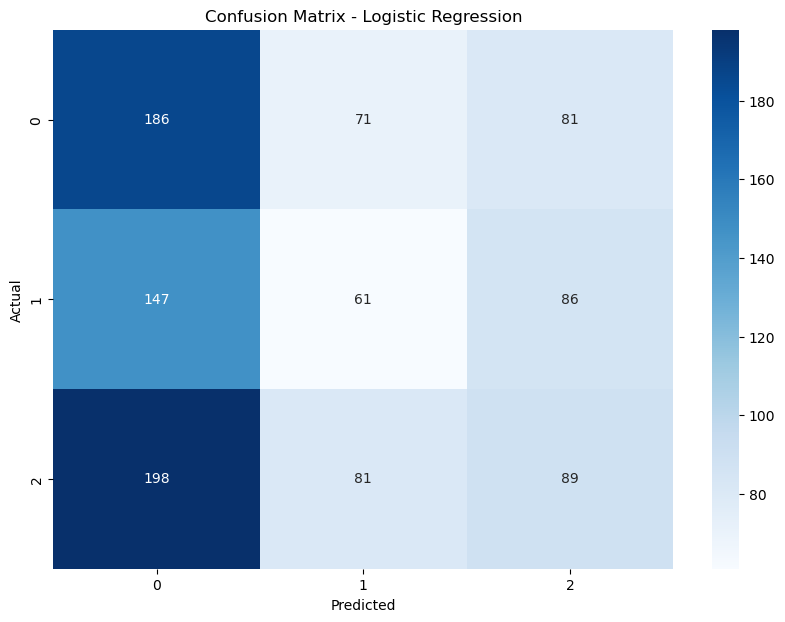

In [16]:
# Step 9: Visualize Predictions
# Visualizing confusion matrix for Logistic Regression
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, lr_model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

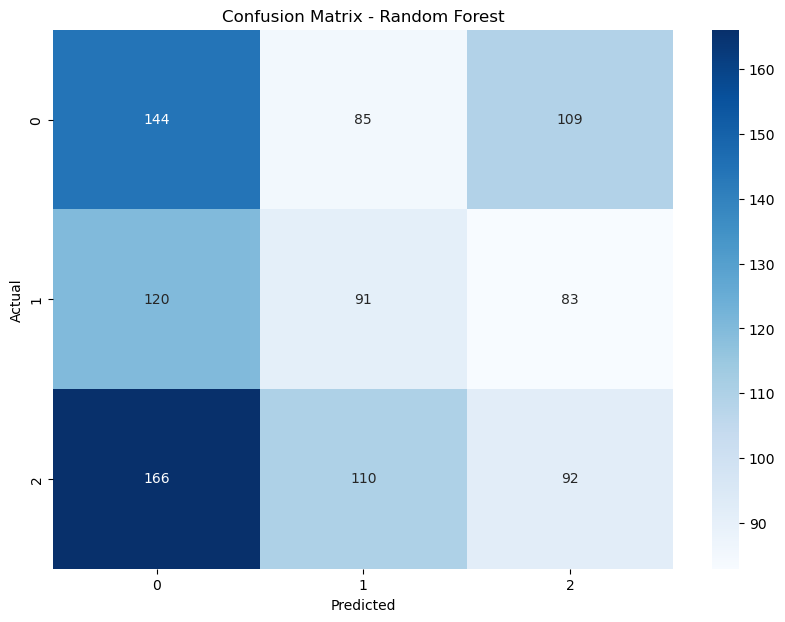

In [17]:
# Visualizing confusion matrix for Random Forest
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()